<a href="https://colab.research.google.com/github/lxshit1/twitter_sentiment-/blob/main/twitter_sentiment_analysis_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
tweets_biden = pd.read_csv(
    '/content/hashtag_joebiden.csv',
    engine='python',
    quoting=1,
    encoding='ISO-8859-1',  # or 'latin1'
    on_bad_lines='warn'     # Warn instead of skipping silently
)

tweets_donald = pd.read_csv(
    '/content/hashtag_donaldtrump.csv',
    engine='python',
    quoting=1,
    encoding='ISO-8859-1',
    on_bad_lines='warn'
)


In [30]:
tweets_biden.shape, tweets_donald.shape


((349869, 21), (324987, 21))

In [31]:

import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

df = tweets_donald.copy()
# Step 1: Drop duplicates and nulls
df.drop_duplicates(subset="tweet", inplace=True)
df.dropna(subset=["tweet"], inplace=True)

# Step 2: Clean tweet text
def clean_tweet(text):
    text = re.sub(r"http\S+|www.\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#", "", text)  # remove hashtag symbol but keep text
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars and numbers
    text = text.lower()  # convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df["cleaned_tweet"] = df["tweet"].astype(str).apply(clean_tweet)

# Step 3: Filter out very short tweets
df = df[df["cleaned_tweet"].apply(lambda x: len(x.split()) >= 5)]

# Step 5: Use TF-IDF and KMeans to select diverse, meaningful tweets
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["cleaned_tweet"])

# Cluster the tweets into 10 groups for diversity
kmeans = KMeans(n_clusters=10, random_state=42)
df["cluster"] = kmeans.fit_predict(X)



In [32]:
# csv file of meaningful tweets
df.to_csv('meaningful_df_donald.csv', index=False)
meaningful_df_donald = pd.read_csv('meaningful_df_donald.csv')
meaningful_df_donald

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,cleaned_tweet,cluster
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,elecciones en florida joebiden dice que donald...,5
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,usa trump contro facebook e twitter coprono bi...,5
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump as a student i used to hear for years fo...,9
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,hours since last tweet from trump maybe he is ...,9
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,you get a tie and you get a tie trump s rally ...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,2020-10-29 13:19:06,1.321804e+18,#TRUMP2020 #CCP #MEGA #VOTE #CCPVIREUS #THENE...,1.0,0.0,Twitter Web App,1.161906e+18,ç¥è¦æºé ­,mY3WJueYji9ftBU,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30 14:49:36.356935,trump ccp mega vote ccpvireus thenewfedralstat...,7
297662,2020-10-29 13:19:08,1.321804e+18,I find it amusing that #trump has pinned his r...,0.0,0.0,Twitter Web App,1.528442e+08,Ripley in CT,RipleyInCT,CT native. #UConn. #Scorpio. #SelfEmployed #Sa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30 14:49:36.252157,i find it amusing that trump has pinned his re...,0
297663,2020-10-29 13:19:09,1.321804e+18,Trump throws gas on a fire and then extinguish...,3.0,0.0,Twitter Web App,2.532558e+07,romel espinel,CUDJOE70,Librarian ð writer â¨ï¸ & artist ð¨âð...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30 14:49:36.539982,trump throws gas on a fire and then extinguish...,7
297664,2020-10-29 13:19:10,1.321804e+18,TrÃ¨s maladroitement #trump fait de la politiq...,0.0,0.0,Twitter Web App,8.090685e+17,Politicoboy,politicoboyTX,"Blogueur politique spÃ©cialisÃ© USA, de retou...",...,29.758938,-95.367697,Houston,United States of America,North America,Texas,TX,2020-10-30 14:49:36.400425,trs maladroitement trump fait de la politique ...,3


In [33]:

import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

df1 = tweets_biden.copy()
# Step 1: Drop duplicates and nulls
df1.drop_duplicates(subset="tweet", inplace=True)
df1.dropna(subset=["tweet"], inplace=True)

# Step 2: Clean tweet text
def clean_tweet(text):
    text = re.sub(r"http\S+|www.\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#", "", text)  # remove hashtag symbol but keep text
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars and numbers
    text = text.lower()  # convert to lowercase
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df1["cleaned_tweet"] = df1["tweet"].astype(str).apply(clean_tweet)

# Step 3: Filter out very short tweets
df1 = df1[df1["cleaned_tweet"].apply(lambda x: len(x.split()) >= 5)]

# Step 5: Use TF-IDF and KMeans to select diverse, meaningful tweets
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df1["cleaned_tweet"])

# Cluster the tweets into 10 groups for diversity
kmeans = KMeans(n_clusters=10, random_state=42)
df1["cluster"] = kmeans.fit_predict(X)



In [34]:
df1.to_csv('meaningful_df_biden.csv')
meaningful_df_biden = pd.read_csv('meaningful_df_biden.csv')
meaningful_df_biden.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
meaningful_df_biden['candidate'] = 'Biden'
meaningful_df_donald['candidate'] = 'Trump'
source_df1 = pd.concat([meaningful_df_biden, meaningful_df_donald])


<ipython-input-36-1733550675>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





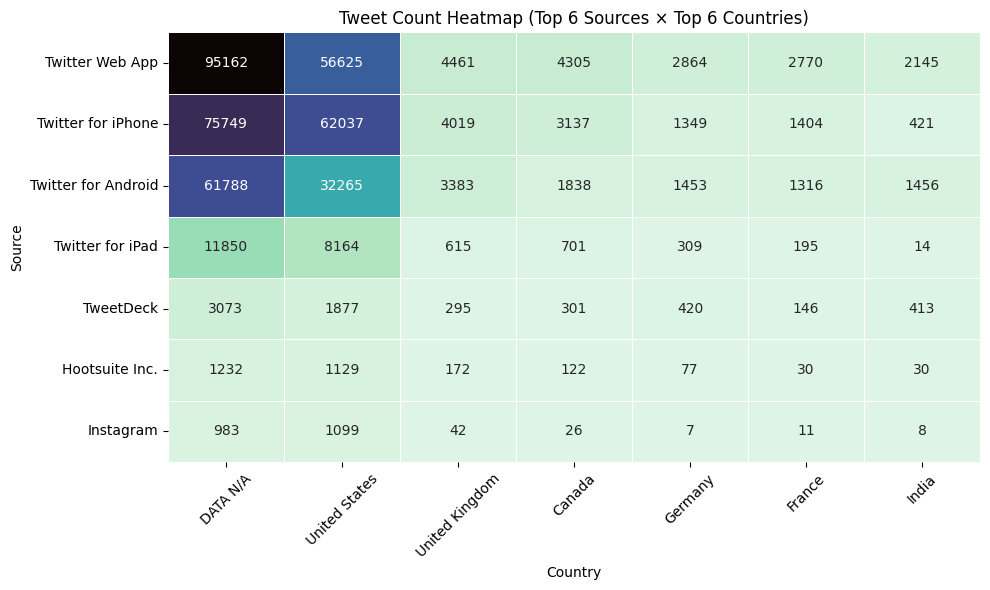

In [36]:
source_df=pd.concat([meaningful_df_biden[['source','cleaned_tweet','country']].copy(),meaningful_df_donald[['source','cleaned_tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('DATA N/A')
source_df=source_df.drop_duplicates()


sources=pd.DataFrame(source_df.groupby(['source'])['cleaned_tweet'].count().sort_values(ascending=False)[:6])


country=pd.DataFrame(source_df.groupby(['country'])['cleaned_tweet'].count().sort_values(ascending=False)[:6])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 6 sources and top 6 countries (with order preserved)
top_sources = source_df['source'].value_counts().nlargest(7)
top_countries = source_df['country'].value_counts().nlargest(7)

# Step 2: Filter the original DataFrame
filtered_df = source_df[
    source_df['source'].isin(top_sources.index) &
    source_df['country'].isin(top_countries.index)
]

# Step 3: Group and pivot into heatmap-friendly format
heatmap = (
    filtered_df
    .groupby(['source', 'country'])['cleaned_tweet']
    .count()
    .unstack(fill_value=0)
)

# Step 4: Reorder rows and columns according to descending counts
heatmap = heatmap.loc[top_sources.index, top_countries.index]

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt='d', cmap='mako_r', linewidths=0.5, cbar=False)
plt.title("Tweet Count Heatmap (Top 6 Sources × Top 6 Countries)")
plt.xlabel("Country")
plt.ylabel("Source")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [37]:
tweets_for_trump = pd.DataFrame(meaningful_df_donald.groupby(['country'])['cleaned_tweet'].count().sort_values(ascending=False)[:15])
tweets_for_biden = pd.DataFrame(meaningful_df_biden.groupby(['country'])['cleaned_tweet'].count().sort_values(ascending=False)[:15])


In [38]:
!pip install geopandas plotly


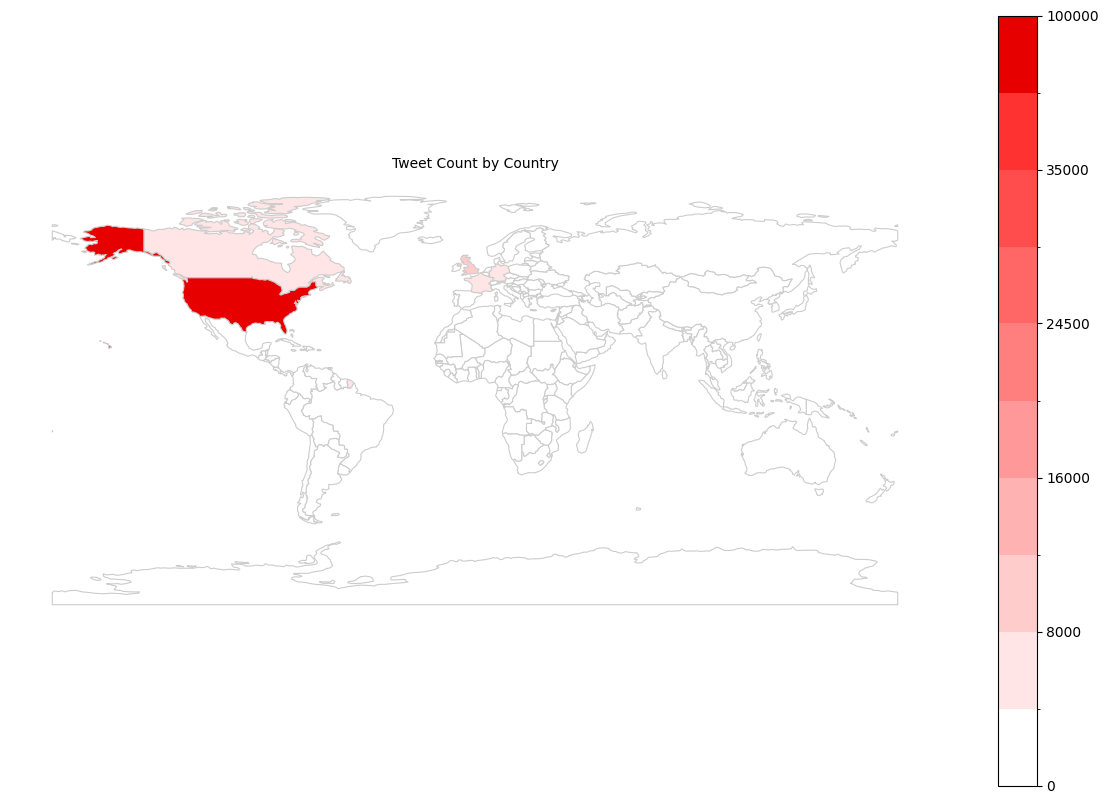

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Merge with world geometry
world = world.merge(tweets_for_trump, how="left", left_on="NAME", right_on="country")
world["cleaned_tweet"] = world["cleaned_tweet"].fillna(0)

colors = [
    "#ffffff", "#ffe5e5", "#ffcccc", "#ffb2b2", "#ff9999",
    "#ff7f7f", "#ff6666", "#ff4c4c", "#ff3232", "#e60000"
]
cmap = ListedColormap(colors)
# Define 10 bins from 0 to 10,000
bounds = [0, 4000, 8000, 12000, 16000, 20000, 24500, 30000, 35000, 40000, 100000]
norm = BoundaryNorm(boundaries=bounds, ncolors=len(colors))

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='cleaned_tweet', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title("Tweet Count by Country", fontdict={'fontsize': 10})
ax.axis('off')
plt.show()


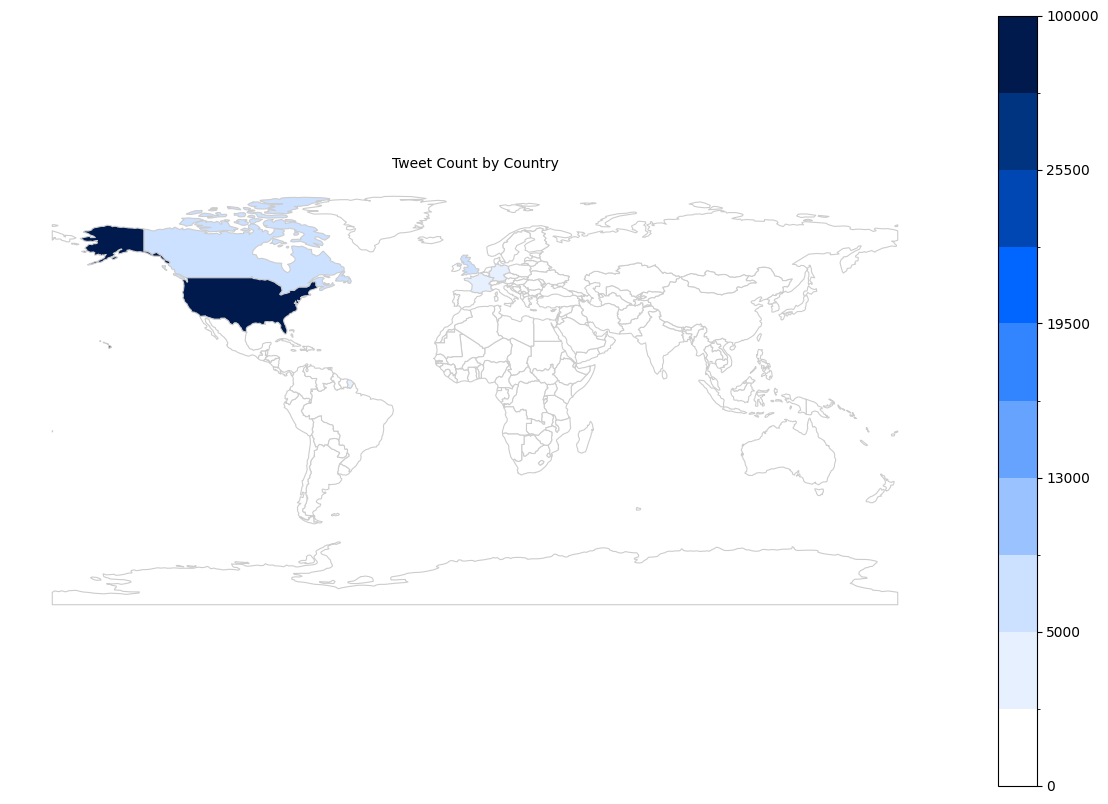

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Merge with world geometry
world = world.merge(tweets_for_biden, how="left", left_on="NAME", right_on="country")
world["cleaned_tweet"] = world["cleaned_tweet"].fillna(0)

colors = [
    "#ffffff",  # white
    "#e6f0ff",  # very light blue
    "#cce0ff",
    "#99c2ff",
    "#66a3ff",
    "#3385ff",
    "#0066ff",
    "#0047b3",
    "#003380",
    "#001a4d"   # very dark blue
]
cmap = ListedColormap(colors)
# Define 10 bins from 0 to 10,000
bounds = [0, 3000, 5000, 10000, 13000,16000, 19500, 22000, 25500, 30000, 100000]
norm = BoundaryNorm(boundaries=bounds, ncolors=len(colors))

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='cleaned_tweet', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title("Tweet Count by Country", fontdict={'fontsize': 10})
ax.axis('off')
plt.show()


,country,cleaned_tweet,candidate
0,Australia,2887,Trump
1,Bangladesh,807,Trump
2,Canada,6774,Trump
3,France,4949,Trump
4,Georgia,714,Trump
5,Germany,5167,Trump
6,India,3177,Trump
7,Italy,2146,Trump
8,Mexico,1315,Trump
9,Spain,1048,Trump


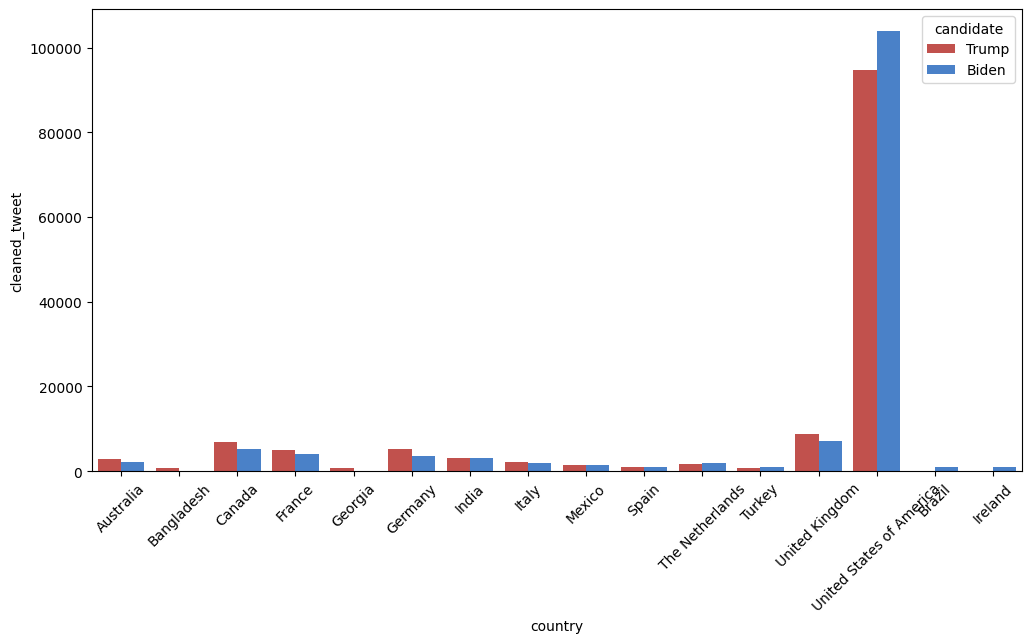

In [41]:
tweets_for_trump.reset_index(inplace = True)
tweets_for_trump['country'] = tweets_for_trump['country'].replace('United States','United States of America')
tweets_for_trump = pd.DataFrame(tweets_for_trump.groupby('country')['cleaned_tweet'].sum())

tweets_for_biden.reset_index(inplace=True)
tweets_for_biden['country'] = tweets_for_biden['country'].replace('United States','United States of America')
tweets_for_biden = pd.DataFrame(tweets_for_biden.groupby('country')['cleaned_tweet'].sum())

t_list = ["Trump" for i in range(0,14)]
tweets_for_trump['candidate'] = t_list
b_list = ["Biden" for i in range(0,14)]
tweets_for_biden['candidate'] = b_list
t_b_tweetcount = pd.concat([tweets_for_trump, tweets_for_biden], axis=0)
t_b_tweetcount.reset_index(inplace = True)



plt.figure(figsize=(12,6))
import seaborn as sns
sns.barplot(t_b_tweetcount, x="country", y="cleaned_tweet", hue="candidate", palette={'Trump': '#d43f3a', 'Biden': '#357edd'})
plt.xticks(rotation=45)
t_b_tweetcount

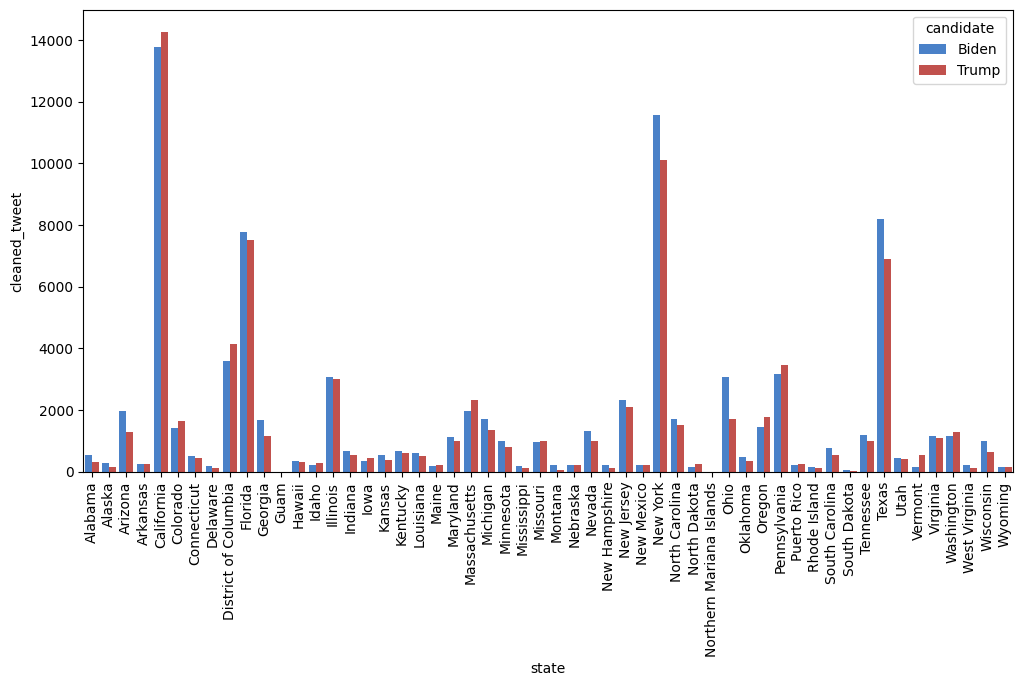

In [42]:
meaningful_df_donald = meaningful_df_donald[meaningful_df_donald['country'] == 'United States of America']
meaningful_df_biden = meaningful_df_biden[meaningful_df_biden['country'] == 'United States of America']

trump_tweetcount = pd.DataFrame(meaningful_df_donald.groupby('state')['cleaned_tweet'].count()).reset_index()
biden_tweetcount = pd.DataFrame(meaningful_df_biden.groupby('state')['cleaned_tweet'].count()).reset_index()



biden_tweetcount['candidate'] = 'Biden'
trump_tweetcount['candidate'] = 'Trump'
# 1 - selecting only the tweets from USA
merged_df = pd.concat([biden_tweetcount.copy(),trump_tweetcount.copy()],axis = 0)

merged_df
plt.figure(figsize=(12,6))
sns.barplot(merged_df, x="state", y="cleaned_tweet", hue="candidate", palette={'Trump': '#d43f3a', 'Biden': '#357edd'})
plt.xticks(rotation=90)
plt.show()

In [43]:
trumptweetcount = merged_df[merged_df['candidate'] == 'Trump'].iloc[:,1]
bidentweetcount = merged_df[merged_df['candidate'] == 'Biden'].iloc[:,1]
trumptweetcount = trumptweetcount.reset_index().drop(['index'],axis=1).squeeze()
tb_tweetcount1 = pd.DataFrame({'state' : merged_df['state'].unique(), 'tweetcount(Biden)' : bidentweetcount, 'tweetcount(Trump)' : trumptweetcount})
tb_tweetcount1


,state,tweetcount(Biden),tweetcount(Trump)
0,Alabama,529,317.0
1,Alaska,299,167.0
2,Arizona,1962,1288.0
3,Arkansas,266,266.0
4,California,13777,14266.0
5,Colorado,1414,1631.0
6,Connecticut,524,451.0
7,Delaware,189,108.0
8,District of Columbia,3585,4127.0
9,Florida,7778,7501.0


In [44]:
us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT",
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI",
    "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME",
    "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
    "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA",
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"}
import pandas as pd
import plotly.graph_objects as go
import numpy as np
df = tb_tweetcount1.copy()
# Create a combined metric column where:
# Positive values = Biden advantage
# Negative values = Trump advantage
df['combined_advantage'] = df['tweetcount(Biden)'] - df['tweetcount(Trump)']
df['state_abbrev'] = df['state'].map(us_state_to_abbrev)
# Create the figure
fig = go.Figure()

# Add Trump layer (red for negative values)
fig.add_trace(go.Choropleth(
    locations=df['state_abbrev'],
    z=df['combined_advantage'].where(df['combined_advantage'] < 0),  # Only show Trump advantage
    locationmode='USA-states',
    colorscale='Reds',
    zmin=df['combined_advantage'].min(),
    zmax=0,  # Scale from max Trump advantage to 0
    name='Trump',
    hoverinfo='location+z+text',
    hovertext=df['state'] + '<br>Trump +' + abs(df['combined_advantage']).astype(str),
    showscale=False,
    marker_opacity=0.7  # Correct parameter name for opacity
))

# Add Biden layer (blue for positive values)
fig.add_trace(go.Choropleth(
    locations=df['state_abbrev'],
    z=df['combined_advantage'].where(df['combined_advantage'] > 0),  # Only show Biden advantage
    locationmode='USA-states',
    colorscale='Blues',
    zmin=0,  # Scale from 0 to max Biden advantage
    zmax=df['combined_advantage'].max(),
    name='Biden',
    hoverinfo='location+z+text',
    hovertext=df['state'] + '<br>Biden +' + df['combined_advantage'].astype(str),
    showscale=False,
    marker_opacity=0.7  # Correct parameter name for opacity
))

# Add layout configuration
fig.update_layout(
    title_text='Tweet Dominance by State: Biden (Blue) vs Trump (Red)',
    geo=dict(
        scope='usa',
        lakecolor='lightblue',
        showsubunits=True,
        subunitcolor='grey',
        bgcolor='rgba(0,0,0,0)'
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Add a custom legend
fig.add_annotation(
    x=0.02, y=0.95,
    xref='paper', yref='paper',
    text='<b>Biden</b>',
    font=dict(color='blue', size=12),
    showarrow=False
)
fig.add_annotation(
    x=0.02, y=0.90,
    xref='paper', yref='paper',
    text='<b>Trump</b>',
    font=dict(color='red', size=12),
    showarrow=False
)

fig.show()

In [45]:
import pandas as pd
import plotly.express as px


# Use your existing DataFrame
df = tb_tweetcount1.copy()
df['state_abbrev'] = df['state'].map(us_state_to_abbrev)
# Add a column for winner
df['winner'] = df.apply(lambda row: 'Biden' if row['tweetcount(Biden)'] > row['tweetcount(Trump)'] else 'Trump', axis=1)

# Map winner to colors
color_map = {'Biden': '#357edd', 'Trump': '#d43f3a'}
df['color'] = df['winner'].map(color_map)

# Create the choropleth map for USA states
fig = px.choropleth(
    df,
    locations=df['state_abbrev'],             # State abbreviations, e.g. 'CA', 'NY'
    locationmode='USA-states',    # This must be 'USA-states' for US state choropleths
    color='winner',                # Column used for color
    color_discrete_map=color_map, # Assign colors manually
    scope='usa',                  # Focus map on USA only
    title='Tweet Dominance by State: Biden (Blue) vs Trump (Red)',
)

fig.update_geos(showlakes=True, lakecolor='lightblue')
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


In [46]:
!pip install vaderSentiment
# Import required libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    """
    Analyze sentiment using VADER and return classification
    Returns: 'positive', 'negative', or 'neutral'
    """
    # Get polarity scores
    scores = analyzer.polarity_scores(text)

    # Classify based on compound score
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Example usage with a DataFrame containing tweets
def analyze_tweet_sentiment(df, text_column='text'):
    """
    Analyze sentiment for a DataFrame of tweets
    Args:
        df: DataFrame containing tweets
        text_column: Name of column containing tweet text
    Returns:
        DataFrame with added sentiment columns
    """
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()

    # Apply sentiment analysis
    df['sentiment'] = df[text_column].apply(vader_sentiment_analysis)

    # Get polarity scores for each tweet
    df['polarity_scores'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x))

    # Extract individual score components
    df['negative'] = df['polarity_scores'].apply(lambda x: x['neg'])
    df['neutral'] = df['polarity_scores'].apply(lambda x: x['neu'])
    df['positive'] = df['polarity_scores'].apply(lambda x: x['pos'])
    df['compound'] = df['polarity_scores'].apply(lambda x: x['compound'])

    return df

# Example usage
if __name__ == "__main__":
    # Sample data (replace with your actual tweet data)
    sample_tweets = meaningful_df_biden['cleaned_tweet']

    # Create DataFrame
    tweets_df = pd.DataFrame({'text': sample_tweets})

    # Analyze sentiment
    results_df_biden = analyze_tweet_sentiment(tweets_df)



In [47]:
!pip install vaderSentiment
# Import required libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    """
    Analyze sentiment using VADER and return classification
    Returns: 'positive', 'negative', or 'neutral'
    """
    # Get polarity scores
    scores = analyzer.polarity_scores(text)

    # Classify based on compound score
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Example usage with a DataFrame containing tweets
def analyze_tweet_sentiment(df, text_column='text'):
    """
    Analyze sentiment for a DataFrame of tweets
    Args:
        df: DataFrame containing tweets
        text_column: Name of column containing tweet text
    Returns:
        DataFrame with added sentiment columns
    """
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()

    # Apply sentiment analysis
    df['sentiment'] = df[text_column].apply(vader_sentiment_analysis)

    # Get polarity scores for each tweet
    df['polarity_scores'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x))

    # Extract individual score components
    df['negative'] = df['polarity_scores'].apply(lambda x: x['neg'])
    df['neutral'] = df['polarity_scores'].apply(lambda x: x['neu'])
    df['positive'] = df['polarity_scores'].apply(lambda x: x['pos'])
    df['compound'] = df['polarity_scores'].apply(lambda x: x['compound'])

    return df

# Example usage
if __name__ == "__main__":
    # Sample data (replace with your actual tweet data)
    sample_tweets = meaningful_df_donald['cleaned_tweet']

    # Create DataFrame
    tweets_df = pd.DataFrame({'text': sample_tweets})

    # Analyze sentiment
    results_df_trump = analyze_tweet_sentiment(tweets_df)



In [48]:
results_df_biden_sentiment = pd.DataFrame(results_df_biden['sentiment'].value_counts().reset_index()).sort_values(by='sentiment')
results_df_trump_sentiment = pd.DataFrame(results_df_trump['sentiment'].value_counts().reset_index()).sort_values(by='sentiment')
results_df_biden_sentiment, results_df_trump_sentiment

(  sentiment  count
 1  negative  27456
 2   neutral  25555
 0  positive  33566,
   sentiment  count
 0  negative  32569
 2   neutral  19358
 1  positive  28219)

Text(0.5, 1.0, 'Biden Tweet Sentiment')

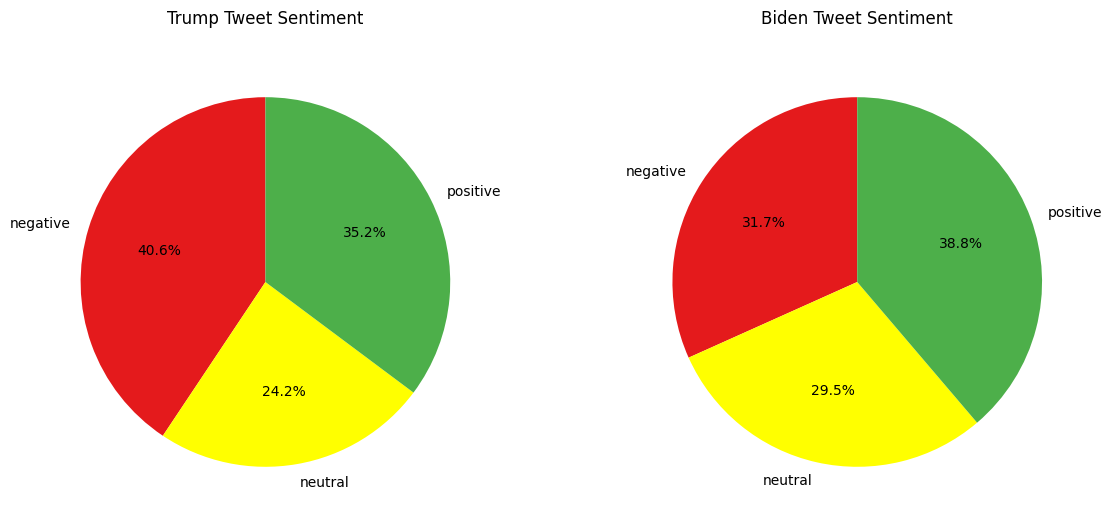

In [49]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
positive_color = '#4daf4a'  # Muted green
negative_color = '#e41a1c'  # Muted red
neutral_color = '#FFFF00'   # Muted orange-yellow (more visible than pure yellow)
colors = [negative_color, neutral_color,positive_color]

axes[0].pie(list(results_df_trump_sentiment['count']), labels = results_df_trump_sentiment['sentiment'], autopct='%1.1f%%',startangle=90,colors = colors)
axes[1].pie(list(results_df_biden_sentiment['count']), labels = results_df_biden_sentiment['sentiment'], autopct='%1.1f%%',startangle=90,colors = colors)
axes[0].set_title('Trump Tweet Sentiment', pad=20)
axes[1].set_title('Biden Tweet Sentiment', pad=20)

In [50]:
biden_tweet1 = pd.DataFrame({'tweet' : meaningful_df_biden['cleaned_tweet'],
                             'time of tweet' : meaningful_df_biden['collected_at'],
                             'state' : meaningful_df_biden['state'],
                             'sentiment' : results_df_biden['sentiment'],
                             'likes count' : meaningful_df_biden['likes']})
biden_tweet1
positive_biden_tweet = biden_tweet1[biden_tweet1['sentiment'] == 'positive'].reset_index()
negative_biden_tweet = biden_tweet1[biden_tweet1['sentiment'] == 'negative'].reset_index()

trump_tweet1 = pd.DataFrame({'tweet' : meaningful_df_donald['cleaned_tweet'],
                             'time of tweet' : meaningful_df_donald['collected_at'],
                             'state' : meaningful_df_donald['state'],
                             'sentiment' : results_df_trump['sentiment'],
                             'likes count' : meaningful_df_donald['likes']})
positive_trump_tweet = trump_tweet1[trump_tweet1['sentiment'] == 'positive'].reset_index()
negative_trump_tweet = trump_tweet1[trump_tweet1['sentiment'] == 'negative'].reset_index()

In [51]:
sentiment_trump_favour = positive_trump_tweet.copy()
sentiment_biden_favour = positive_biden_tweet.copy()

In [52]:
statewise_sentiment_trump_favour = pd.DataFrame(sentiment_trump_favour.groupby(['state'])['tweet'].count())
statewise_sentiment_biden_favour = pd.DataFrame(sentiment_biden_favour.groupby(['state'])['tweet'].count())


joint_statewise_sentiments = pd.concat([statewise_sentiment_biden_favour, statewise_sentiment_trump_favour],axis = 1).reset_index()

joint_statewise_sentiments.columns = ['state', 'biden_tweetcount', 'trump_tweetcount']

joint_statewise_sentiments

,state,biden_tweetcount,trump_tweetcount
0,Alabama,226,134
1,Alaska,114,86
2,Arizona,776,498
3,Arkansas,105,101
4,California,5521,5270
5,Colorado,571,594
6,Connecticut,204,156
7,Delaware,86,36
8,District of Columbia,1319,1324
9,Florida,2822,2510


In [53]:
import pandas as pd
import plotly.express as px


# Use your existing DataFrame
df = joint_statewise_sentiments.copy()
df['state_abbrev'] = df['state'].map(us_state_to_abbrev)
# Add a column for winner
df['winner'] = df.apply(lambda row: 'Biden' if row['biden_tweetcount'] > row['trump_tweetcount'] else 'Trump', axis=1)

# Map winner to colors
color_map = {'Biden': '#357edd', 'Trump': '#d43f3a'}
df['color'] = df['winner'].map(color_map)

# Create the choropleth map for USA states
fig = px.choropleth(
    df,
    locations=df['state_abbrev'],             # State abbreviations, e.g. 'CA', 'NY'
    locationmode='USA-states',    # This must be 'USA-states' for US state choropleths
    color='winner',                # Column used for color
    color_discrete_map=color_map, # Assign colors manually
    scope='usa',                  # Focus map on USA only
    title='Tweet Dominance by State: Biden (Blue) vs Trump (Red)',
)

fig.update_geos(showlakes=True, lakecolor='lightblue')
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


In [54]:
statewise_sentiment_trump_favour1 = pd.DataFrame(sentiment_trump_favour.groupby(['state'])['tweet'].count())
statewise_sentiment_biden_favour1 = pd.DataFrame(sentiment_biden_favour.groupby(['state'])['tweet'].count())
statewise_sentiment_trump_against1 =pd.DataFrame(negative_trump_tweet.groupby(['state'])['tweet'].count())
statewise_sentiment_biden_against1 =pd.DataFrame(negative_biden_tweet.groupby(['state'])['tweet'].count())
# Step 1: Rename columns
statewise_sentiment_biden_favour1.rename(columns={'tweet': 'biden_positive'}, inplace=True)
statewise_sentiment_biden_against1.rename(columns={'tweet': 'biden_negative'}, inplace=True)
statewise_sentiment_trump_favour1.rename(columns={'tweet': 'trump_positive'}, inplace=True)
statewise_sentiment_trump_against1.rename(columns={'tweet': 'trump_negative'}, inplace=True)

# Step 2: Merge all DataFrames on state
from functools import reduce

dfs = [
    statewise_sentiment_biden_favour1,
    statewise_sentiment_biden_against1,
    statewise_sentiment_trump_favour1,
    statewise_sentiment_trump_against1
]

dfs = pd.DataFrame({'state': sentiment_biden_favour['state'],
                    'biden_positive':statewise_sentiment_biden_favour1['biden_positive'],
                    'biden_negative': statewise_sentiment_biden_against1['biden_negative'],
                    'trump_positive': statewise_sentiment_trump_favour1['trump_positive'],
                    'trump_negative': statewise_sentiment_trump_against1['trump_negative']})

<ipython-input-55-842632105>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0.5, 1.0, 'net sentiments (accounting 100% negative)')

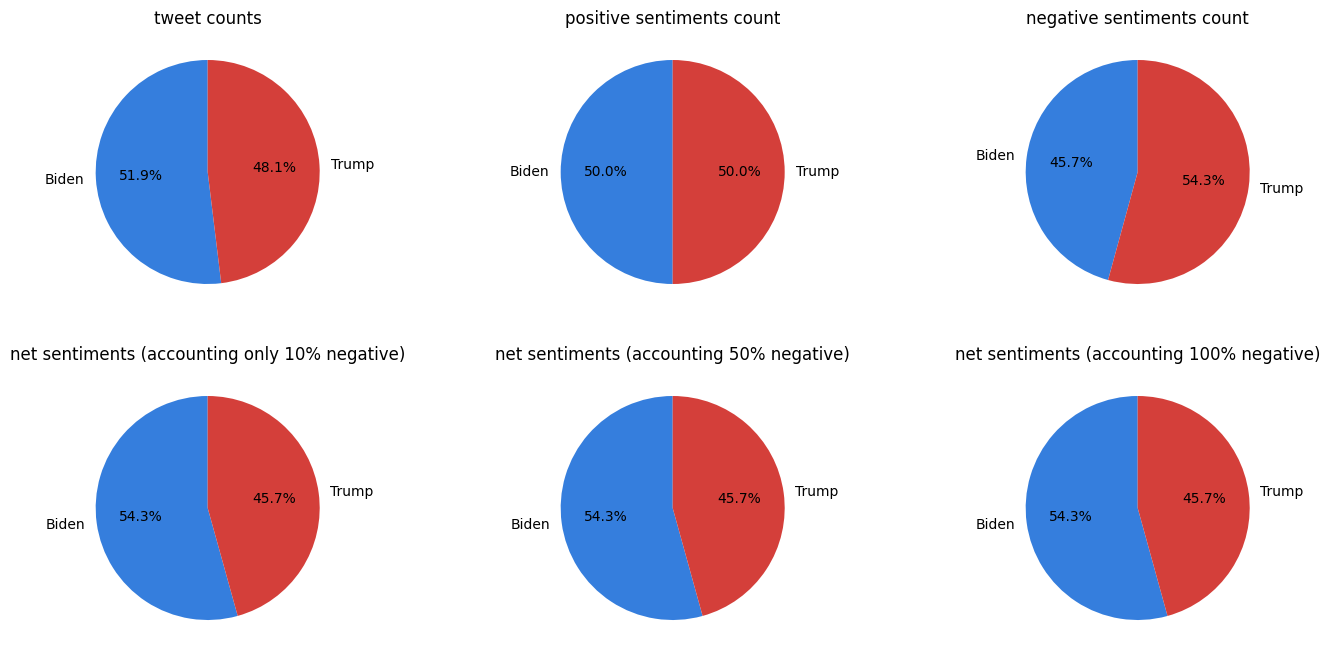

In [55]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,3, figsize = (17,8))
ax[0,0].pie([meaningful_df_biden.shape[0],meaningful_df_donald.shape[0]],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[0,0].set_title('tweet counts')
ax[0,1].pie([statewise_sentiment_biden_favour.sum()[0], statewise_sentiment_biden_favour.sum()[0]],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[0,1].set_title('positive sentiments count')
ax[0,2].pie([dfs['biden_negative'].sum(),dfs['trump_negative'].sum()],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[0,2].set_title('negative sentiments count')
ax[1,0].pie([(dfs['biden_positive'].sum() + 0.1*dfs['trump_negative'].sum()),(dfs['trump_positive'].sum()+0.1*dfs['biden_negative'].sum())],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[1,0].set_title('net sentiments (accounting only 10% negative)')
ax[1,1].pie([(dfs['biden_positive'].sum() + 0.5*dfs['trump_negative'].sum()),(dfs['trump_positive'].sum()+0.5*dfs['biden_negative'].sum())],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[1,1].set_title('net sentiments (accounting 50% negative)')
ax[1,2].pie([(dfs['biden_positive'].sum() + 1*dfs['trump_negative'].sum()),(dfs['trump_positive'].sum()+1*dfs['biden_negative'].sum())],labels = ['Biden', 'Trump'],startangle=90,autopct ='%1.1f%%',colors = [ '#357edd','#d43f3a'])
ax[1,2].set_title('net sentiments (accounting 100% negative)')

In [61]:
import plotly.express as px

# Copy and prepare data
data1 = source_df1.copy()
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

# Create bar chart with number labels and black background
fig = px.bar(
    tweets_count,
    x='candidate',
    y='tweet',
    color='candidate',
    text='tweet',  # Show exact tweet count on bars
    color_discrete_map={'Trump': 'red', 'Biden': 'blue'},
    labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
    title='Tweets for Candidates'
)

# Customize layout for dark theme and text styling
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
)

# Optionally adjust text position if needed
fig.update_traces(textposition='outside')

# Show chart
fig.show()


In [60]:
# Interactive bar chart
likes_comparison =source_df1.groupby('candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate',
color_discrete_map={'Trump': 'red', 'Biden': 'blue'},
labels={'candidate': 'Candidate', 'likes': 'Total Likes'},
title='Comparison of Likes', text='likes')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

In [58]:
import plotly.express as px

# Copy data
data = source_df1.copy()

# Group by candidate to calculate total likes and total tweets
likes = data.groupby('candidate')['likes'].sum()
tweets = data.groupby('candidate')['tweet'].count()

# Calculate like density (average likes per tweet)
like_density = (likes / tweets).reset_index()
like_density.columns = ['candidate', 'avg_likes_per_tweet']

# Plot bar chart
fig = px.bar(
    like_density,
    x='candidate',
    y='avg_likes_per_tweet',
    color='candidate',
    text='avg_likes_per_tweet',
    color_discrete_map={'Trump': 'red', 'Biden': 'blue'},
    labels={'candidate': 'Candidate', 'avg_likes_per_tweet': 'Avg Likes per Tweet'},
    title='Average Likes per Tweet (Like Density)'
)

# Update layout for dark theme
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)

# Show value labels outside bars
fig.update_traces(textposition='outside')

# Show chart
fig.show()


In [59]:
# Top10 Countrywise tweets Counts
top10countries = data1.groupby('country')['tweet'].count(
).sort_values(ascending=False).reset_index().head(10)
# top10countries

# Interactive bar chart
fig = px.bar(top10countries, x='country', y='tweet',
template='plotly_dark',
color_discrete_sequence=px.colors.qualitative.Dark24_r,
title='Top10 Countrywise tweets Counts')

# To view the graph
fig.show()